In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset for training
raw_data_train = pd.read_csv('~/nba-dl/data/matches/RS/book-RS.csv')
raw_data_train.columns

Index(['SEASON_ID', 'HOME_TEAM_NAME', 'AWAY_TEAM_NAME', 'GAME_ID', 'GAME_DATE',
       'HWIN', 'HPLUSMINUS', 'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A',
       'HFG3_PCT', 'HFTM', 'HFTA', 'HFT_PCT', 'HOREB', 'HDREB', 'HREB', 'HAST',
       'HSTL', 'HBLK', 'HTOV', 'HPF', 'AFGM', 'AFGA', 'AFG_PCT', 'AFG3M',
       'AFG3A', 'AFG3_PCT', 'AFTM', 'AFTA', 'AFT_PCT', 'AOREB', 'ADREB',
       'AREB', 'AAST', 'ASTL', 'ABLK', 'ATOV', 'APF'],
      dtype='object')

In [3]:
# dataset shape
raw_data_train.shape

(24154, 41)

In [4]:
'''
GLOSSARY:

HWIN     - home team win, W means win, L means loss, later W is mapped to 1, L to 0 - LABEL
HFGM     - home team field goal made
HFGA     - home team field goal attempts
HFG_PCT  - home team percentage field goal
HFG3M    - home team 3PT field goal made
HFG3A    - home team 3PT field goal attempts
HFG3_PCT - home team percentage 3PT field goal
HFTM     - home team free throws made
HFTA     - home team free throws attempts
HFT_PCT  - home team percentage free throws
HOREB    - home team offensive rebounds
HDREB    - home team defensive rebounds
HAST     - home team assists
HSTL     - home team steals
HBLK     - home team blocks
HTOV     - home team turnovers
HPF      - home team personal fouls
AFGM     - away team field goal made
AFGA     - away team field goal attempts
AFG_PCT  - away team percentage field goal
AFG3M    - away team 3PT field goal made
AFG3A    - away team 3PT field goal attempts
AFG3_PCT - away team percentage 3PT field goal
AFTM     - away team free throws made
AFTA     - away team free throws attempts
AFT_PCT  - away team percentage free throws
AOREB    - away team offensive rebounds
ADREB    - away team defensive rebounds
AAST     - away team assists
ASTL     - away team steals
ABLK     - away team blocks
ATOV     - away team turnovers
APF      - away team personal fouls
'''

# selecting numerical features

columns = ['HWIN',
           'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A', 'HFG3_PCT', 'HFTM', 'HFTA', 'HFT_PCT',
           'HOREB', 'HDREB', 'HREB', 'HAST', 'HSTL', 'HBLK', 'HTOV', 'HPF',
           'AFGM', 'AFGA', 'AFG_PCT', 'AFG3M', 'AFG3A', 'AFG3_PCT', 'AFTM', 'AFTA', 'AFT_PCT',
           'AOREB', 'ADREB', 'AREB', 'AAST', 'ASTL', 'ABLK', 'ATOV', 'APF']

In [5]:
# making new dataset with selected columns
data_train = raw_data_train[columns]
data_train.head()

,HWIN,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,W,39,79,0.494,4,12,0.333,28,30,0.933,...,21,0.762,14,31,45,26,7,5,15,30
1,W,30,78,0.385,7,19,0.368,23,32,0.719,...,8,0.750,21,39,60,17,5,3,15,24
2,L,40,89,0.449,5,11,0.455,23,29,0.793,...,22,0.727,10,37,47,32,10,3,17,30
3,W,47,79,0.595,4,8,0.500,10,20,0.500,...,28,0.679,10,18,28,20,9,4,16,25
4,L,38,92,0.413,4,15,0.267,20,25,0.800,...,35,0.771,12,26,38,26,6,3,17,20


In [6]:
# new dataset shape
data_train.shape

(24154, 35)

In [7]:
# describe dataset
data_train.describe()

,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,HOREB,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
count,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,...,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000
mean,37.734702,82.282231,0.459618,6.989526,19.418233,0.356756,18.649996,24.611700,0.758554,11.366440,...,23.607394,0.756082,11.029271,30.726588,41.755858,21.107725,7.560901,4.620850,14.047942,21.474331
std,5.295061,7.728873,0.056808,3.638958,7.900855,0.120779,6.338755,7.850081,0.099730,4.047894,...,7.553324,0.102972,3.959669,5.344786,6.456121,5.013086,2.897159,2.459221,3.940520,4.595665
min,19.000000,54.000000,0.247000,0.000000,1.000000,0.000000,1.000000,1.000000,0.143000,1.000000,...,1.000000,0.143000,0.000000,12.000000,20.000000,4.000000,0.000000,0.000000,3.000000,5.000000
25%,34.000000,77.000000,0.420000,4.000000,14.000000,0.278000,14.000000,19.000000,0.696000,9.000000,...,18.000000,0.692000,8.000000,27.000000,37.000000,18.000000,6.000000,3.000000,11.000000,18.000000
50%,38.000000,82.000000,0.458000,7.000000,18.000000,0.357000,18.000000,24.000000,0.765000,11.000000,...,23.000000,0.762000,11.000000,31.000000,42.000000,21.000000,7.000000,4.000000,14.000000,21.000000
75%,41.000000,87.000000,0.500000,9.000000,24.000000,0.433000,23.000000,30.000000,0.826000,14.000000,...,28.000000,0.828000,14.000000,34.000000,46.000000,24.000000,9.000000,6.000000,17.000000,24.000000
max,62.000000,125.000000,0.684000,27.000000,70.000000,1.000000,48.000000,64.000000,1.000000,33.000000,...,64.000000,1.000000,38.000000,56.000000,81.000000,46.000000,20.000000,18.000000,32.000000,42.000000


In [8]:
# map labels to numeric values

data_train['HWIN'] = data_train['HWIN'].map({'W': 1, 'L': 0})
data_train.head()

/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,HWIN,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,1,39,79,0.494,4,12,0.333,28,30,0.933,...,21,0.762,14,31,45,26,7,5,15,30
1,1,30,78,0.385,7,19,0.368,23,32,0.719,...,8,0.750,21,39,60,17,5,3,15,24
2,0,40,89,0.449,5,11,0.455,23,29,0.793,...,22,0.727,10,37,47,32,10,3,17,30
3,1,47,79,0.595,4,8,0.500,10,20,0.500,...,28,0.679,10,18,28,20,9,4,16,25
4,0,38,92,0.413,4,15,0.267,20,25,0.800,...,35,0.771,12,26,38,26,6,3,17,20


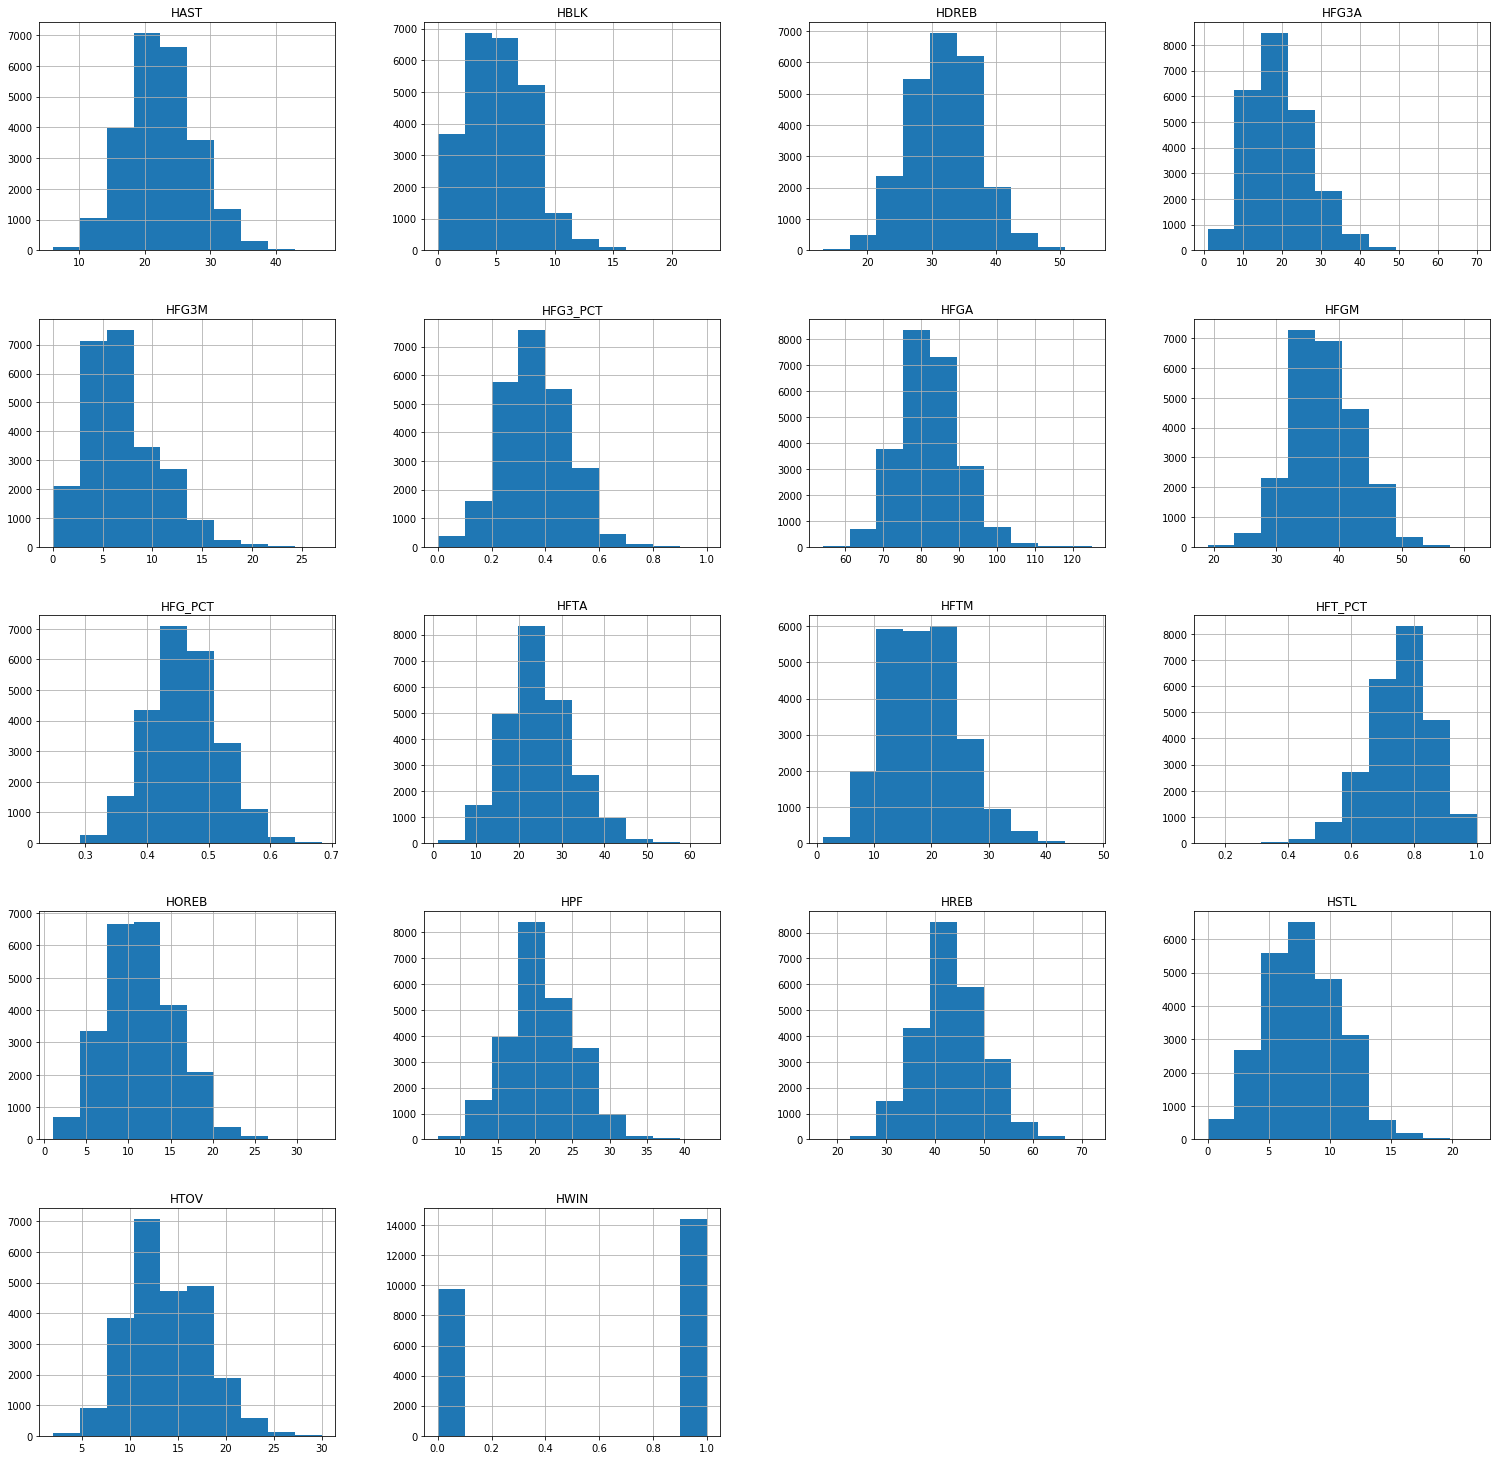

In [19]:
'''
Data visualization.
Same types of stats were collected for home and away team.
To keep notes clear, I selected only first part for home team.
'''

stats = ['HWIN', 'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A', 'HFG3_PCT', 'HFTM', 'HFTA',
         'HFT_PCT', 'HOREB', 'HDREB', 'HREB', 'HAST', 'HSTL', 'HBLK', 'HTOV', 'HPF']
visualize_data = data_train[stats]
visualize_data.hist()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

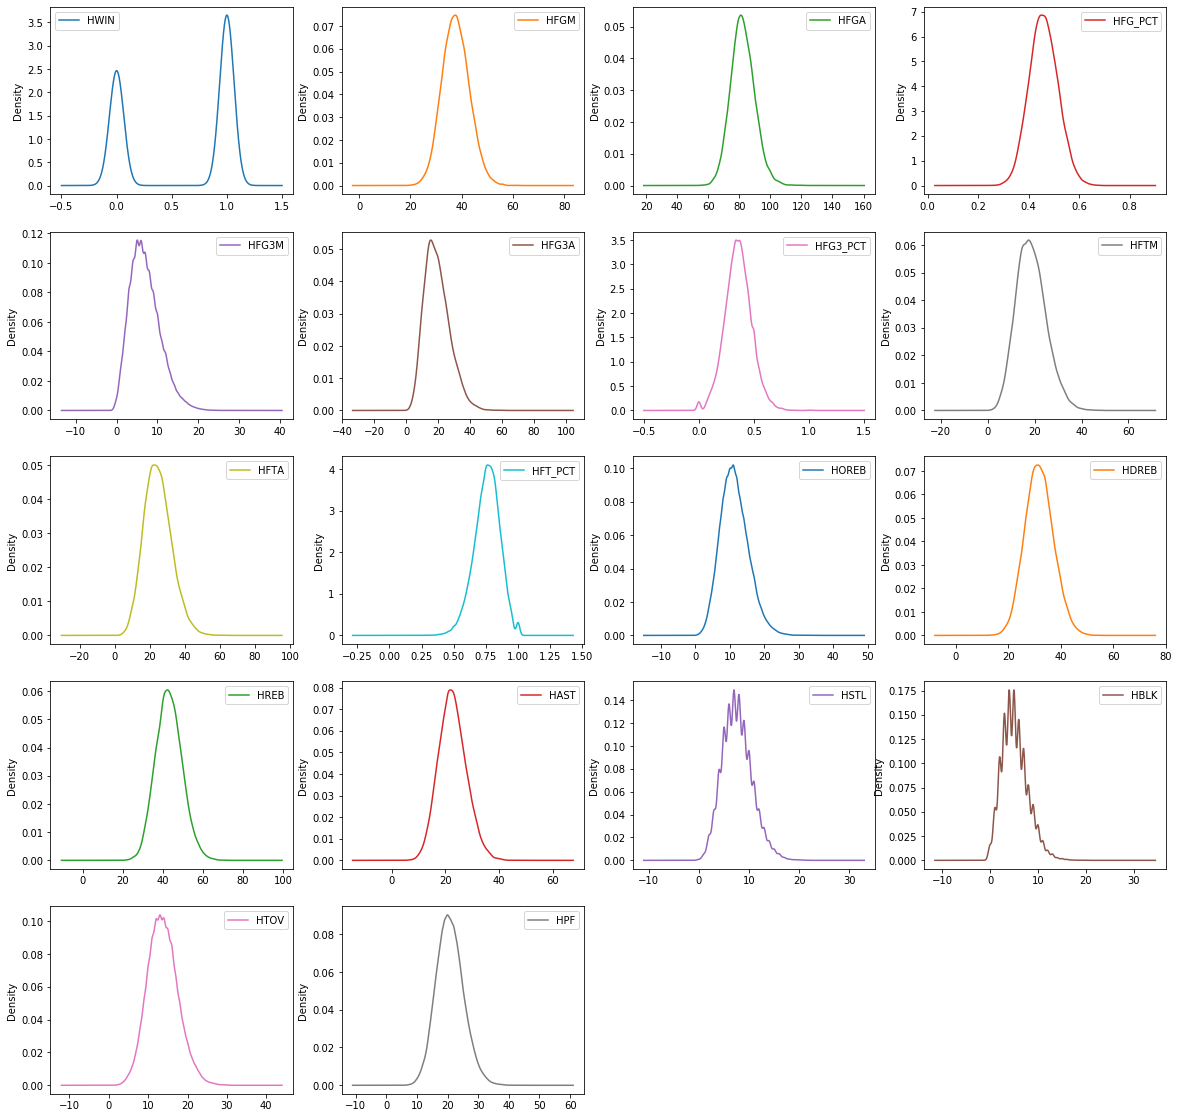

In [10]:
'''
Density plots - another way to check feature distribution
'''
visualize_data.plot(kind='density', subplots=True, layout=(5,4), sharex=False)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

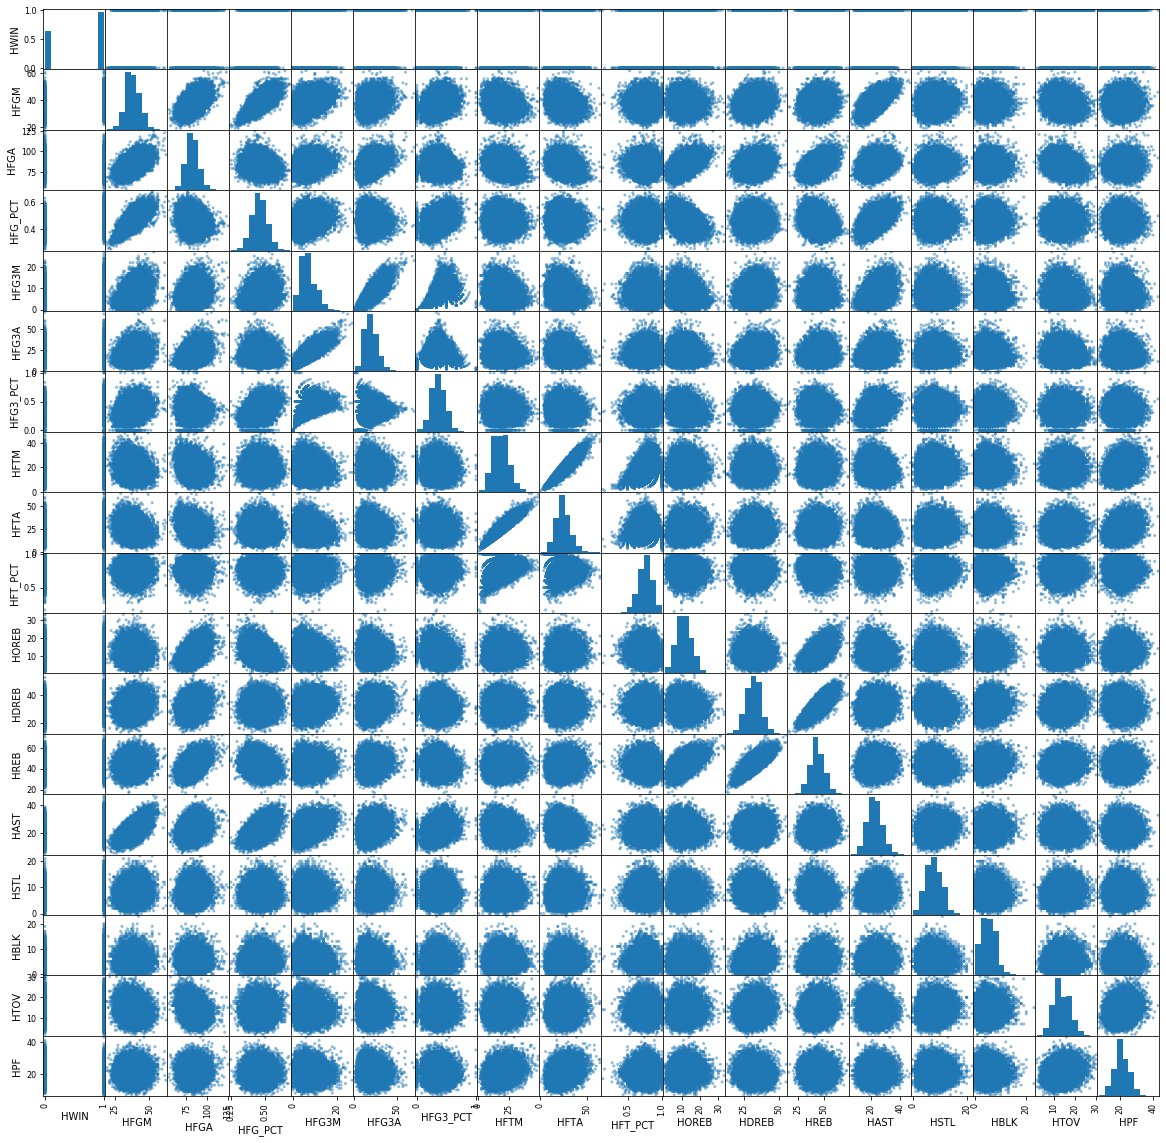

In [11]:
'''
Scatter Plot Matrix:

Helps to check relationship between two attributes. Creates scatter plot for each pair of attributes. 
Can be useful to check structured relationship between variables.
'''

from pandas.plotting import scatter_matrix
scatter_matrix(visualize_data)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [12]:
# FEATURE SELECTION METHODS

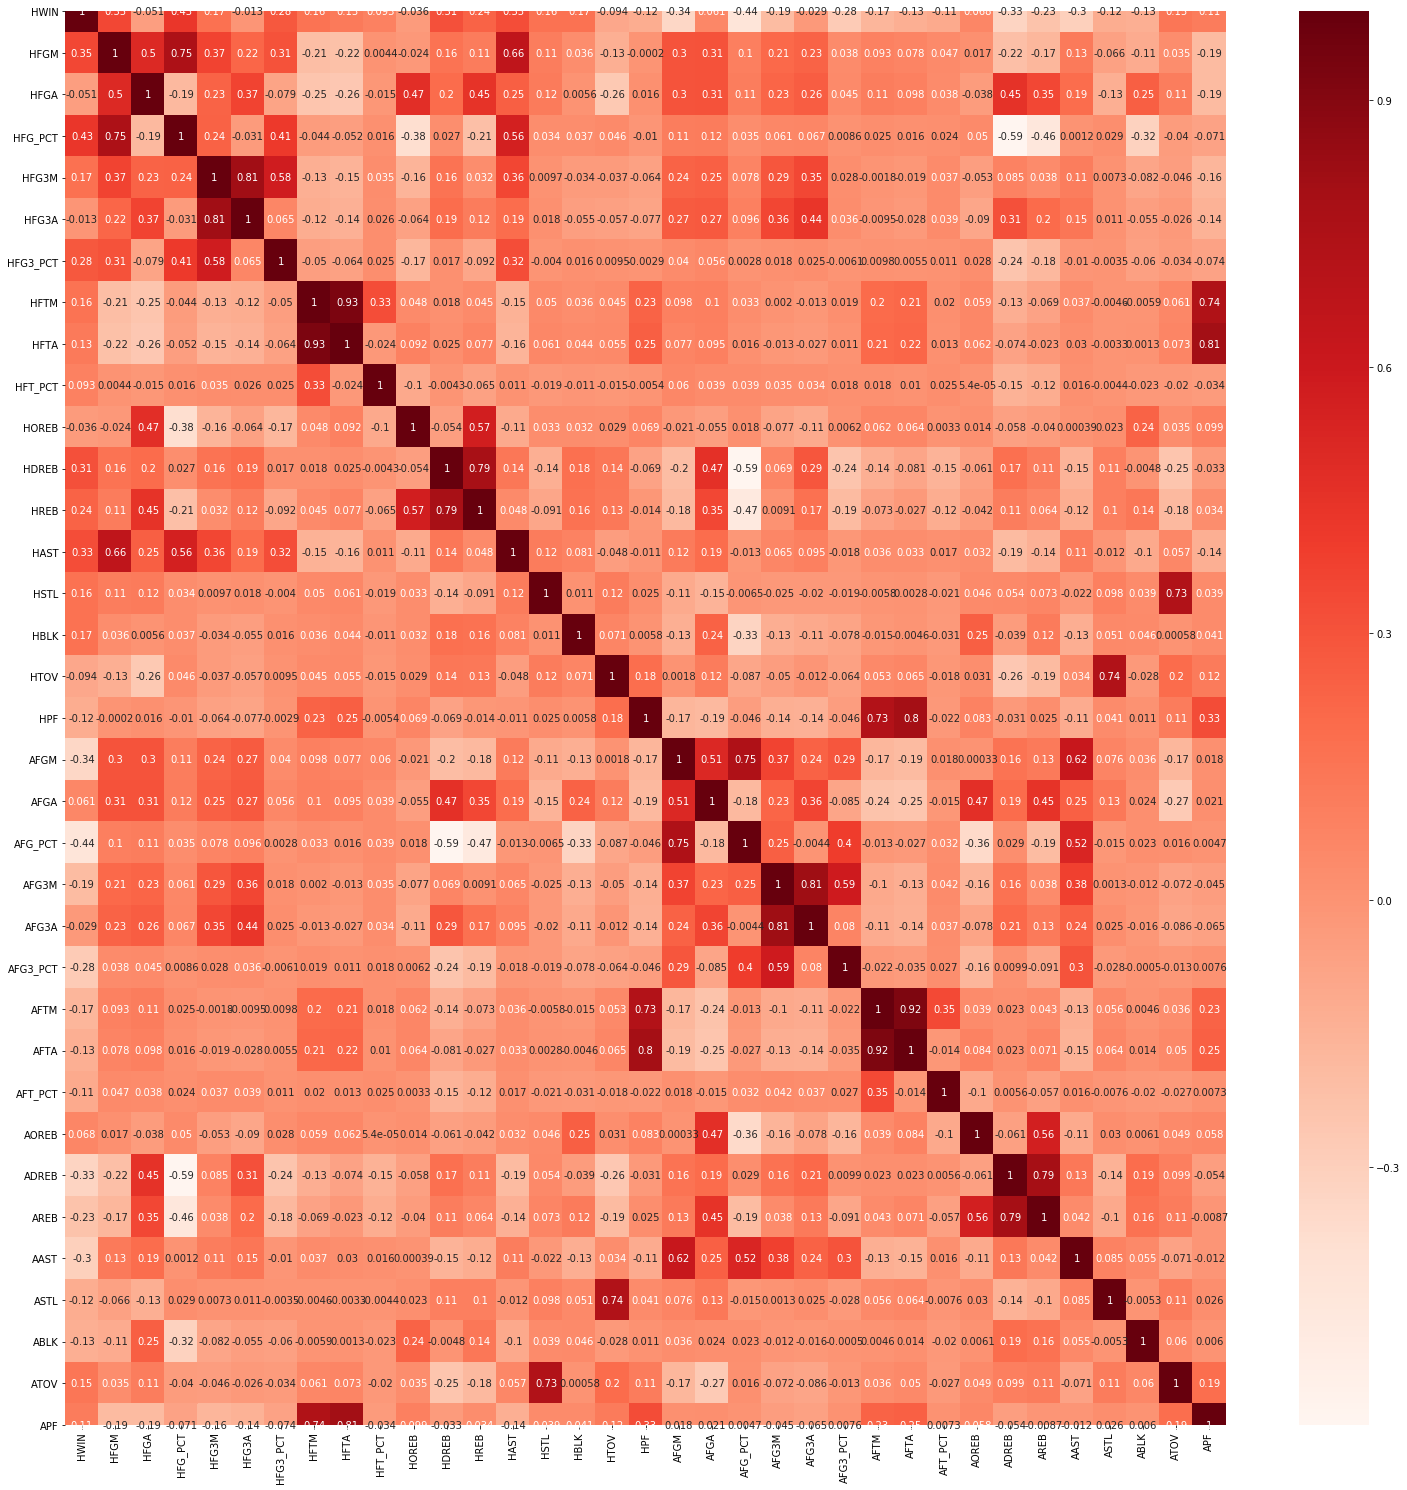

Relevant features from Pearson correlation:['HFGM', 'HFG_PCT', 'HDREB', 'HAST', 'AFGM', 'AFG_PCT', 'ADREB']


In [13]:
'''
Pearson Correlation:

The Pearson correlation coefficient can take a range of values from +1 to -1.
A value of 0 indicates that there is no association between the two variables. 
A value greater than 0 indicates a positive association.
A value less than 0 indicates a negative association.
'''

cor = data_train.corr()
plt.rcParams["figure.figsize"] = (26,26)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor['HWIN'])
relevant_pearson = cor_target[cor_target>0.3]
relevant_pearson = list(relevant_pearson.keys()[1:])
print("Relevant features from Pearson correlation:{}".format(relevant_pearson))

In [14]:
# separate data to features(X) and labels(y)
X_train = data_train.drop("HWIN", 1)
y_train = data_train["HWIN"]

In [15]:
"""
Univariate selection

We can use statistical tests to determine which features have the strongest relationship with the label.
SelectKBest class from scikit-learn provides set of tests and we're gonna use chi^2 statistical test.
Features with the highest scores have the best relationship with output variable.
"""

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2)
fit = test.fit(X_train, y_train)
set_printoptions(precision=5)

stats_dict_us = {}

for i in range(len(columns[1:])):
    stats_dict_us[str(columns[i+1])] = fit.scores_[i]
# top features
sorted(stats_dict_us.items(), key=lambda x: x[1], reverse=True)[:7]

[('HAST', 3033.231097915293),
 ('AAST', 2572.379707190321),
 ('ADREB', 2428.994042741848),
 ('HDREB', 2192.675782105841),
 ('HFGM', 2171.604663718264),
 ('AFGM', 2025.6847624750244),
 ('AFG3M', 1737.324253058538)]

In [16]:
'''
Recursive Feature Elimination

This model recursively removes features to identify which of them have the biggest impact on output attribute.
Presented example uses RFE with logistic regression to identify top 12 features.
'''
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(X_train, y_train)

stats_dict_rfe = {}
support = fit.get_support()
for i in range(len(columns[1:])):
    stats_dict_rfe[str(columns[i+1])] = support[i]
# top features
[item for item in stats_dict_rfe.items() if item[1] == True]

[('HFGM', True),
 ('HFG3M', True),
 ('HFG3_PCT', True),
 ('HFTM', True),
 ('AFGM', True),
 ('AFG3M', True),
 ('AFTM', True)]

In [17]:
'''
Feature Importance

To identify importance of features, we can use decision trees, like in example below.
Attributes with the biggest value have the strongest relationship.
'''
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
stats_dict_featureimportance = {}
for i in range(len(columns[1:])):
    stats_dict_featureimportance[str(columns[i+1])] = model.feature_importances_[i]
# top features
sorted(stats_dict_featureimportance.items(), key=lambda x: x[1], reverse=True)[:7]

[('HFG_PCT', 0.0985735418755069),
 ('AFG_PCT', 0.09824523479856288),
 ('HFGM', 0.06313474185321323),
 ('AFGM', 0.05271308548986354),
 ('ADREB', 0.04239906397144013),
 ('HAST', 0.03713665543690543),
 ('HREB', 0.03307893872300657)]

In [18]:
'''
PCA - Principal component analysis

It's the technique that allows us to convert highly dimensional dataset to smaller one.
Most important features are being extracted to provide maximized information about dataset.
Features are selected basing on variance that they cause in the output.
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(X_train)
print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.21598 0.1518  0.12378 0.0893  0.08236 0.06528 0.05597 0.04603 0.03523
 0.0293 ]
[[ 1.75595e-01  3.87599e-01 -2.84866e-05  1.43545e-01  3.80800e-01
   4.30146e-04 -1.68400e-01 -2.15873e-01 -1.83241e-04  1.53075e-02
   1.75009e-01  1.90317e-01  1.12342e-01 -7.75531e-03  6.72824e-03
  -3.33812e-02 -1.13547e-01  1.68781e-01  3.82341e-01 -3.44257e-05
   1.35156e-01  3.70722e-01  2.95141e-04 -1.44019e-01 -1.85868e-01
  -1.52201e-04  1.85326e-02  1.74998e-01  1.93531e-01  1.13639e-01
  -2.66298e-03  1.36949e-02 -4.02449e-02 -1.25424e-01]
 [ 1.43969e-02  1.35829e-01 -5.67212e-04  2.29713e-02  1.05096e-01
  -6.87741e-04  4.11828e-01  5.28572e-01  4.66940e-04  6.37852e-02
   1.12795e-01  1.76580e-01 -9.92736e-03  6.20076e-03  2.12460e-02
   2.60098e-02  2.07883e-01  6.60355e-02  2.23599e-01 -4.07971e-04
   4.10234e-02  1.36306e-01 -3.13764e-04  2.99478e-01  3.84829e-01
   3.75843e-04  6.81996e-02  9.49590e-02  1.63159e-01  2.71672e-02
   1.41512e-02  1.59921e-02  1.13344e-